Adding 3D perturbations to a 2D equilibrium (J-TEXT)
====================================================

In [1]:
import fusionsc as fsc
from fusionsc.devices import jtext
import numpy as np

import matplotlib.pyplot as plt

We use J-TEXT as an example for a 3D perturbation applied to a 2D equilibrium. We use an example equilibrium for the J-TEXT Tokamak (which is just the contents of an EFit geqdsk file). On top of that equilibrium, we apply a perturbation field generated by the island coils. The field will then be calculated as `field + coilCurrent * perturbation`.

In [2]:
efitExample = jtext.exampleGeqdsk()
lines = efitExample.split('\n')

for i in range(20):
    print(lines[i])
print()
print('... {} lines follow ...'.format(len(lines) - 20))

  EFID    16/03/13     #     75  400ms             0  65  65
 7.000000000e-01 7.000000000e-01 1.050000000e+00 7.000000000e-01 0.000000000e+00
 1.063671875e+00 0.000000000e+00 3.229880485e-02 1.512832695e-02 1.400000000e+00
 7.500000000e+04 3.229880485e-02 0.000000000e+00 1.063671875e+00 0.000000000e+00
 0.000000000e+00 0.000000000e+00 1.512832695e-02 0.000000000e+00 0.000000000e+00
 1.480607441e+00 1.480103394e+00 1.479615448e+00 1.479143353e+00 1.478686857e+00
 1.478245708e+00 1.477819652e+00 1.477408437e+00 1.477011806e+00 1.476629505e+00
 1.476261278e+00 1.475906867e+00 1.475566015e+00 1.475238465e+00 1.474923958e+00
 1.474622235e+00 1.474333035e+00 1.474056099e+00 1.473791166e+00 1.473537974e+00
 1.473296263e+00 1.473065769e+00 1.472846230e+00 1.472637384e+00 1.472438966e+00
 1.472250714e+00 1.472072363e+00 1.471903648e+00 1.471744305e+00 1.471594069e+00
 1.471452675e+00 1.471319857e+00 1.471195349e+00 1.471078885e+00 1.470970199e+00
 1.470869025e+00 1.470775095e+00 1.470688143e+00

In [3]:
field = fsc.magnetics.MagneticConfig.fromEFit(efitExample)
geometry = jtext.hfsLimiter() + jtext.target()

perturbation = jtext.islandCoils([1] * 6)

We pre-calculate the perturbation and the background field separately, so that field + current * perturbation can be efficiently computed.

In [4]:
grid = jtext.defaultGrid()
geoGrid = jtext.defaultGeometryGrid()

field = field.compute(grid)
perturbation = perturbation.compute(grid)

geometry = geometry.index(geoGrid)

Now we run Poincaré plots for a few different cases

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 0


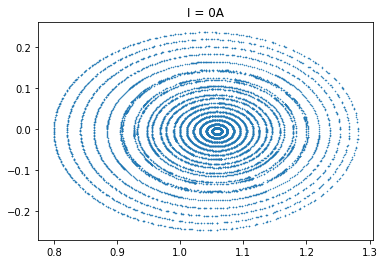

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 2000


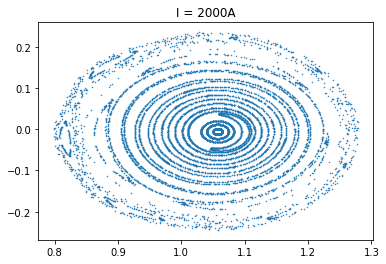

Perturbed field:
 sum:
  - computedField:
      grid:
        rMin: 0.69999999999999996
        rMax: 1.3999999999999999
        zMin: -0.34999999999999998
        zMax: 0.34999999999999998
        nSym: 1
        nR: 70
        nZ: 70
        nPhi: 128
  - scaleBy:
      field:
        computedField:
          grid:
            rMin: 0.69999999999999996
            rMax: 1.3999999999999999
            zMin: -0.34999999999999998
            zMax: 0.34999999999999998
            nSym: 1
            nR: 70
            nZ: 70
            nPhi: 128
      factor: 4000


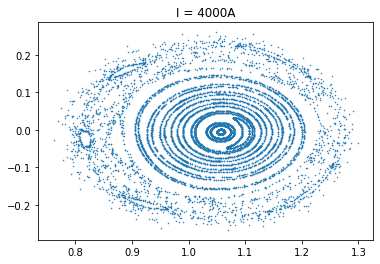

In [6]:
startPoints = np.linspace([0.8, 0, 0], [1.2, 0, 0], 20, axis = 1)

for current in [0, 2000, 4000]:
    perturbedField = field + current * perturbation
    print("Perturbed field:\n", perturbedField.toYaml())
    
    x, y, z, lFwd, lBwd = fsc.flt.poincareInPhiPlanes(
        startPoints,
        perturbedField,
        [0],
        500,
        distanceLimit = 1e5,
        grid = grid # A "+" expression is not a computed field, so we need to specify a grid to evaluate on
    )
    
    plt.figure()
    plt.title("I = {}A".format(current))
    plt.scatter(x, z, marker = '.', s = 1)
    plt.show()